# K-Means Clustering
## Import libraries, load and inspect the data

In [341]:
#  Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# Load the datasets
data = pd.read_excel('LAEI2013_Emissions_Summary-CO2_v1.1.xlsx', sheet_name=1, header=3)
data2 = pd.read_excel('LAEI2013_Emissions_Summary-NOx_v1.1.xlsx', sheet_name=1, header=3)
data3 = pd.read_excel('LAEI2013_Emissions_Summary-PM10_v1.1.xlsx', sheet_name=1, header=3)
data4 = pd.read_excel('LAEI2013_Emissions_Summary-PM2.5_v1.1.xlsx', sheet_name=1, header=3)


#  Inspect the data
print(data2.head())
print(data2.info())
print(data2.describe())

print(data2.columns)

   Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing Borough    Zone  \
0  2008          5910                 1   510500    203500  NonGLA  NonGLA   
1  2008          5911                 2   511500    203500  NonGLA  NonGLA   
2  2008          5912                 3   512500    203500  NonGLA  NonGLA   
3  2008          5915                 4   515500    203500  NonGLA  NonGLA   
4  2008          5916                 5   516500    203500  NonGLA  NonGLA   

   Household and Garden  Small Waste and Accidental Fires  Agriculture  ...  \
0              0.003883                          0.000572     0.201286  ...   
1              0.012427                          0.001170     0.198410  ...   
2              0.007767                          0.002745     0.221414  ...   
3              0.011650                          0.001257     0.204161  ...   
4              0.010097                          0.000292     0.238667  ...   

   Diesel Car  Electric Car  Petrol LGV  Diesel LGV  Ele

## Inspect the columns

In [336]:
print(data4.columns) #inspect column names

Index(['Year', 'LAEI 1km2 ID', 'GRID_ExactCut_ID', 'Easting', 'Northing',
       'Borough', 'Zone', 'Household and Garden',
       'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS',
       'Landfill', 'NRMM Construction', 'NRMM Industry', 'C&D Dust',
       'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels',
       'Commercial Other Fuels', 'Industry Part A', 'Industry Part B',
       'Aviation', 'Passenger Shipping', 'Commercial Shipping', 'Rail Freight',
       'Rail Passengers', 'Resuspension', 'Motorcycle_Exhaust',
       'Motorcycle_Brake', 'Motorcycle_Tyre', 'Taxi_Exhaust', 'Taxi_Brake',
       'Taxi_Tyre', 'Petrol Car_Exhaust', 'Petrol Car_Brake',
       'Petrol Car_Tyre', 'Diesel Car_Exhaust', 'Diesel Car_Brake',
       'Diesel Car_Tyre', 'Electric Car_Exhaust', 'Electric Car_Brake',
       'Electric Car_Tyre', 'Petrol LGV_Exhaust', 'Petrol LGV_Brake',
       'Petrol LGV_Tyre', 'Diesel LGV_Exhaust', 'Diesel LGV_Brake',
       'Diesel LGV_Tyre', 'Electric LGV

## Select only 2013 data

In [280]:
#select only 2013 data
data_2013 = data[data['Year'] == 2013]
data_2013


Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing    Borough  \
6710   2013          5910                 1   510500    203500     NonGLA   
6711   2013          5911                 2   511500    203500     NonGLA   
6712   2013          5912                 3   512500    203500     NonGLA   
6713   2013          5915                 4   515500    203500     NonGLA   
6714   2013          5916                 5   516500    203500     NonGLA   
...     ...           ...               ...      ...       ...        ...   
10060  2013         10059              3351   531500    179500  Southwark   
10061  2013         10059              3352   531500    179500  Southwark   
10062  2013          9714              3353   530500    181500     Camden   
10063  2013          9716              3354   532500    181500  Islington   
10064  2013          9716              3355   532500    181500       City   

          Zone  Household and Garden  Small Waste and Accidental Fires  \
6710    NonGLA                     0                                 0   
6711    NonGLA                     0                                 0   
6712    NonGLA                     0                                 0   
6713    NonGLA                     0                                 0   
6714    NonGLA                     0                                 0   
...        ...                   ...                               ...   
10060    Inner                     0                                 0   
10061  Central                     0                                 0   
10062  Central                     0                                 0   
10063  Central                     0                                 0   
10064  Central                     0                                 0   

       Agriculture  ...   Diesel Car  Electric Car  Petrol LGV   Diesel LGV  \
6710             0  ...    31.009361             0    0.247012    11.142148   
6711             0  ...  3629.820262             0   48.949518  2136.423703   
6712             0  ...  1895.523415             0   26.183085  1063.221961   
6713             0  ...    30.907046             0    0.246190    11.105096   
6714             0  ...    27.905954             0    0.222296    10.027279   
...            ...  ...          ...           ...         ...          ...   
10060            0  ...   110.787465             0    2.653348   118.798967   
10061            0  ...   581.363472             0   16.099168   725.211201   
10062            0  ...  1324.801771             0   34.646186  1546.341737   
10063            0  ...    99.849429             0    2.430795   108.582999   
10064            0  ...  1244.671718             0   27.658061  1235.396217   

       Electric LGV      TfL Bus  Non-TfL Bus and Coach    Artic HGV  \
6710              0     1.866641               2.119227     1.032639   
6711              0    74.311546             180.493117  2443.494624   
6712              0    11.043148              75.213400  1697.340408   
6713              0     1.860839               2.112639     1.025461   
6714              0     1.678366               1.905475     0.927474   
...             ...          ...                    ...          ...   
10060             0   690.082270              15.187670    15.773052   
10061             0  2729.364344             658.868442    86.957566   
10062             0  4347.944079             400.404176   123.603132   
10063             0   307.546510               7.137693    33.404743   
10064             0  3724.741417             777.945882   283.688576   

         Rigid HGV         Total  
6710      6.620063    657.304039  
6711   1071.847896  14568.389161  
6712    603.291676   8034.721767  
6713      6.598140   9313.431445  
6714      5.957539   4275.182041  
...            ...           ...  
10060    77.969138   1510.982881  
10061   659.348362  21493.601755  
10062  1117.082378  53674.269215  
10063   108.762739   4248.233

In [343]:
#select only 2013 data
data2_2013 = data2[data2['Year'] == 2013]
data2_2013


Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing    Borough  \
6710   2013          5910                 1   510500    203500     NonGLA   
6711   2013          5911                 2   511500    203500     NonGLA   
6712   2013          5912                 3   512500    203500     NonGLA   
6713   2013          5915                 4   515500    203500     NonGLA   
6714   2013          5916                 5   516500    203500     NonGLA   
...     ...           ...               ...      ...       ...        ...   
10060  2013         10059              3351   531500    179500  Southwark   
10061  2013         10059              3352   531500    179500  Southwark   
10062  2013          9714              3353   530500    181500     Camden   
10063  2013          9716              3354   532500    181500  Islington   
10064  2013          9716              3355   532500    181500       City   

          Zone  Household and Garden  Small Waste and Accidental Fires  \
6710    NonGLA              0.000085                          0.005889   
6711    NonGLA              0.000273                          0.017001   
6712    NonGLA              0.000170                          0.016231   
6713    NonGLA              0.000256                          0.016385   
6714    NonGLA              0.000222                          0.011980   
...        ...                   ...                               ...   
10060    Inner              0.000002                          0.000130   
10061  Central              0.000126                          0.158665   
10062  Central              0.000137                          0.413971   
10063  Central              0.000002                          0.020986   
10064  Central              0.000015                          0.100335   

       Agriculture  ...  Non-TfL Bus and Coach_Exhaust  \
6710      0.010158  ...                       0.000163   
6711      0.008853  ...                       0.011375   
6712      0.010547  ...                       0.005158   
6713      0.010898  ...                       0.000162   
6714      0.012904  ...                       0.000146   
...            ...  ...                            ...   
10060     0.000002  ...                       0.001136   
10061     0.000099  ...                       0.050220   
10062     0.000000  ...                       0.030428   
10063     0.000030  ...                       0.000559   
10064     0.000302  ...                       0.059282   

       Non-TfL Bus and Coach_Brake  Non-TfL Bus and Coach_Tyre  \
6710                      0.000149                    0.000028   
6711                      0.003170                    0.002191   
6712                      0.001669                    0.000893   
6713                      0.000149                    0.000028   
6714                      0.000134                    0.000025   
...                            ...                         ...   
10060                     0.000681                    0.000127   
10061                     0.039247                    0.007306   
10062                     0.017173                    0.003186   
10063                     0.000428                    0.000079   
10064                     0.031434                    0.005830   

       Artic HGV_Exhaust  Artic HGV_Brake  Artic HGV_Tyre  Rigid HGV_Exhaust  \
6710            0.000053         0.000066        0.000031           0.000386   
6711            0.105108         0.030046        0.061772           0.063264   
6712            0.073946         0.018917        0.042399           0.038239   
6713            0.000052         0.000066        0.000030           0.000385   
6714            0.000047         0.000059        0.000027           0.000347   
...                  ...              ...             ...                ...   
10060           0.000898         0.000811        0.000376           0.004795   
10061           0.004724         0.005073        0.002364      

In [345]:
#select only 2013 data
data3_2013 = data3[data3['Year'] == 2013]
data3_2013

Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing    Borough  \
6710   2013          5910                 1   510500    203500     NonGLA   
6711   2013          5911                 2   511500    203500     NonGLA   
6712   2013          5912                 3   512500    203500     NonGLA   
6713   2013          5915                 4   515500    203500     NonGLA   
6714   2013          5916                 5   516500    203500     NonGLA   
...     ...           ...               ...      ...       ...        ...   
10060  2013         10059              3351   531500    179500  Southwark   
10061  2013         10059              3352   531500    179500  Southwark   
10062  2013          9714              3353   530500    181500     Camden   
10063  2013          9716              3354   532500    181500  Islington   
10064  2013          9716              3355   532500    181500       City   

          Zone  Household and Garden  Small Waste and Accidental Fires  \
6710    NonGLA              0.000091                          0.006338   
6711    NonGLA              0.000290                          0.018299   
6712    NonGLA              0.000181                          0.017470   
6713    NonGLA              0.000272                          0.017637   
6714    NonGLA              0.000236                          0.012895   
...        ...                   ...                               ...   
10060    Inner              0.000003                          0.000140   
10061  Central              0.000134                          0.170796   
10062  Central              0.000146                          0.445587   
10063  Central              0.000002                          0.022588   
10064  Central              0.000016                          0.107998   

       Agriculture  ...  Non-TfL Bus and Coach_Exhaust  \
6710      0.011741  ...                       0.000171   
6711      0.009654  ...                       0.011974   
6712      0.011879  ...                       0.005430   
6713      0.012895  ...                       0.000171   
6714      0.015345  ...                       0.000154   
...            ...  ...                            ...   
10060     0.000002  ...                       0.001196   
10061     0.000118  ...                       0.052863   
10062     0.000000  ...                       0.032030   
10063     0.000036  ...                       0.000588   
10064     0.000361  ...                       0.062402   

       Non-TfL Bus and Coach_Brake  Non-TfL Bus and Coach_Tyre  \
6710                      0.000375                    0.000040   
6711                      0.007966                    0.003130   
6712                      0.004193                    0.001276   
6713                      0.000374                    0.000039   
6714                      0.000337                    0.000036   
...                            ...                         ...   
10060                     0.001712                    0.000181   
10061                     0.098621                    0.010437   
10062                     0.043153                    0.004551   
10063                     0.001076                    0.000113   
10064                     0.078988                    0.008329   

       Artic HGV_Exhaust  Artic HGV_Brake  Artic HGV_Tyre  Rigid HGV_Exhaust  \
6710            0.000055         0.000166        0.000044           0.000406   
6711            0.110641         0.075501        0.088245           0.066594   
6712            0.077838         0.047535        0.060570           0.040252   
6713            0.000055         0.000165        0.000043           0.000405   
6714            0.000050         0.000149        0.000039           0.000366   
...                  ...              ...             ...                ...   
10060           0.000945         0.002038        0.000537           0.005048   
10061           0.004972         0.012746        0.003377      

In [347]:
#select only 2013 data
data4_2013 = data4[data4['Year'] == 2013]
data4_2013

Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing    Borough  \
6710   2013          5910                 1   510500    203500     NonGLA   
6711   2013          5911                 2   511500    203500     NonGLA   
6712   2013          5912                 3   512500    203500     NonGLA   
6713   2013          5915                 4   515500    203500     NonGLA   
6714   2013          5916                 5   516500    203500     NonGLA   
...     ...           ...               ...      ...       ...        ...   
10060  2013         10059              3351   531500    179500  Southwark   
10061  2013         10059              3352   531500    179500  Southwark   
10062  2013          9714              3353   530500    181500     Camden   
10063  2013          9716              3354   532500    181500  Islington   
10064  2013          9716              3355   532500    181500       City   

          Zone  Household and Garden  Small Waste and Accidental Fires  \
6710    NonGLA              0.000085                          0.005889   
6711    NonGLA              0.000273                          0.017001   
6712    NonGLA              0.000170                          0.016231   
6713    NonGLA              0.000256                          0.016385   
6714    NonGLA              0.000222                          0.011980   
...        ...                   ...                               ...   
10060    Inner              0.000002                          0.000130   
10061  Central              0.000126                          0.158665   
10062  Central              0.000137                          0.413971   
10063  Central              0.000002                          0.020986   
10064  Central              0.000015                          0.100335   

       Agriculture  ...  Non-TfL Bus and Coach_Exhaust  \
6710      0.010158  ...                       0.000163   
6711      0.008853  ...                       0.011375   
6712      0.010547  ...                       0.005158   
6713      0.010898  ...                       0.000162   
6714      0.012904  ...                       0.000146   
...            ...  ...                            ...   
10060     0.000002  ...                       0.001136   
10061     0.000099  ...                       0.050220   
10062     0.000000  ...                       0.030428   
10063     0.000030  ...                       0.000559   
10064     0.000302  ...                       0.059282   

       Non-TfL Bus and Coach_Brake  Non-TfL Bus and Coach_Tyre  \
6710                      0.000149                    0.000028   
6711                      0.003170                    0.002191   
6712                      0.001669                    0.000893   
6713                      0.000149                    0.000028   
6714                      0.000134                    0.000025   
...                            ...                         ...   
10060                     0.000681                    0.000127   
10061                     0.039247                    0.007306   
10062                     0.017173                    0.003186   
10063                     0.000428                    0.000079   
10064                     0.031434                    0.005830   

       Artic HGV_Exhaust  Artic HGV_Brake  Artic HGV_Tyre  Rigid HGV_Exhaust  \
6710            0.000053         0.000066        0.000031           0.000386   
6711            0.105108         0.030046        0.061772           0.063264   
6712            0.073946         0.018917        0.042399           0.038239   
6713            0.000052         0.000066        0.000030           0.000385   
6714            0.000047         0.000059        0.000027           0.000347   
...                  ...              ...             ...                ...   
10060           0.000898         0.000811        0.000376           0.004795   
10061           0.004724         0.005073        0.002364      

## Clustering and visualisation of lorry emissions

- This could provide useful insights to the areas where lorry traffic is heaviest, and provide clusters to easily see where the high emissions zones are

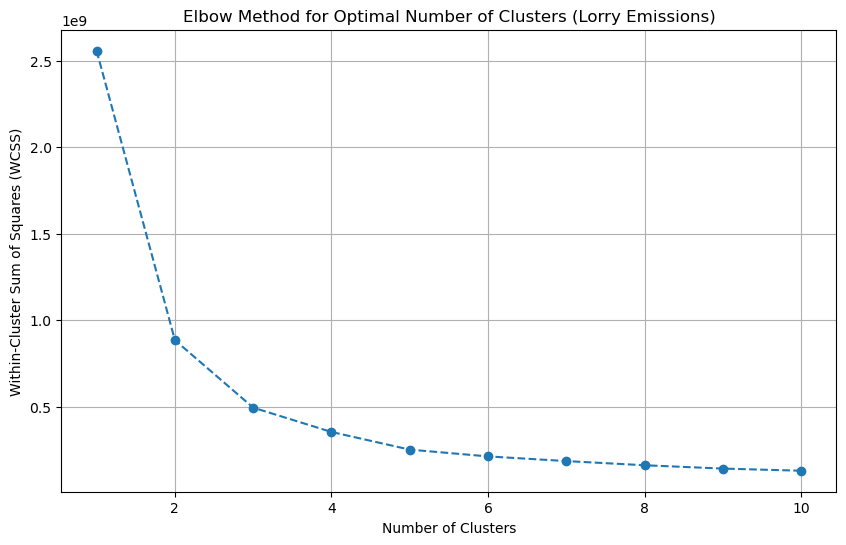

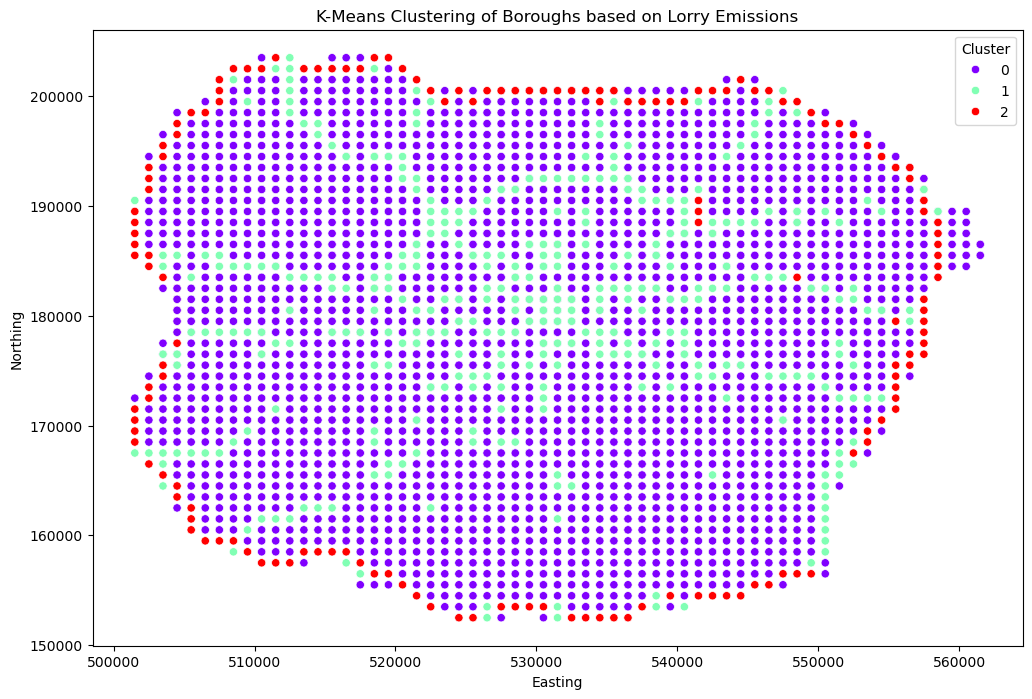

   Cluster         Total
0        0   6444.491272
1        2  14751.705138
2        1  19270.583736
Grid_ID in Cluster 2: [2, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 36, 38, 40, 55, 57, 61, 62, 63, 65, 66, 69, 85, 87, 88, 89, 96, 97, 99, 100, 122, 124, 149, 150, 153, 177, 179, 205, 208, 215, 216, 217, 220, 222, 224, 226, 228, 229, 230, 233, 235, 236, 237, 238, 240, 242, 243, 245, 250, 251, 257, 258, 264, 274, 286, 298, 300, 316, 331, 344, 357, 368, 379, 390, 391, 392, 401, 405, 406, 407, 408, 420, 421, 422, 425, 437, 438, 450, 463, 464, 466, 484, 486, 487, 488, 489, 490, 495, 496, 497, 498, 505, 509, 510, 515, 516, 517, 518, 519, 522, 524, 526, 528, 530, 592, 598, 635, 658, 673, 698, 796, 834, 839, 867, 947, 1063, 1214, 1216, 1218, 1220, 1222, 1224, 1323, 1402, 1443, 1481, 1547, 1590, 1592, 1740, 1886, 1887, 1888, 1896, 1965, 2014, 2037, 2184, 2215, 2253, 2326, 2583, 2585, 2729, 2772, 2816, 2850, 2857, 2926, 2927]
       GRID_ExactCut_ID    Borough         Total
6710              

Cluster  Number of GRID_ExactCut_IDs
0        0                         2776
1        1                          417
2        2                          162

In [421]:
# Prepare the data for clustering
lorry_data = data_2013[['GRID_ExactCut_ID', 'Easting', 'Northing', 'Borough', 'Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV', 'Total']].copy()

# Handle any missing or non-numeric values in the HGV emissions data
lorry_data = lorry_data.dropna(subset=['Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV', 'Total'])

# Ensure all values are numeric
lorry_data[['Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV', 'Total']] = lorry_data[['Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV', 'Total']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
lorry_data = lorry_data.dropna()

# Calculate WCSS for a range of cluster numbers using the Elbow method
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(lorry_data[['Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters (Lorry Emissions)')
plt.grid(True)
plt.show()

# Apply K-Means clustering
optimal_clusters = 3  # based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
lorry_data['Cluster'] = kmeans.fit_predict(lorry_data[['Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV']])

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=lorry_data, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Lorry Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()


# Calculate the mean emissions for each cluster
cluster_summary = lorry_data.groupby('Cluster')[['Total']].mean().reset_index()

# Sort the clusters by mean Total emissions
cluster_summary = cluster_summary.sort_values(by='Total').reset_index(drop=True)

# Print the cluster summary
print(cluster_summary)

# List boroughs by cluster
boroughs_by_cluster = lorry_data.groupby('Cluster')['Borough'].apply(list)

boroughs_by_grid= lorry_data.groupby('Cluster')['GRID_ExactCut_ID'].apply(list)

# List all grid ID in cluster group 1
boroughs_in_grid_2 = boroughs_by_grid.loc[2]

# Display the boroughs in cluster group 1
print(f"Grid_ID in Cluster 2: {boroughs_in_grid_2}")


# List GRID_ExactCut_ID with its Borough and Total emissions
grid_borough_emissions = lorry_data[['GRID_ExactCut_ID', 'Borough', 'Total']]

# Display the result
print(grid_borough_emissions)

# Count the number of GRID_ExactCut_IDs per cluster
grid_ids_per_cluster = lorry_data.groupby('Cluster')['GRID_ExactCut_ID'].count().reset_index()

# Rename columns for clarity
grid_ids_per_cluster.columns = ['Cluster', 'Number of GRID_ExactCut_IDs']

# Display the table
grid_ids_per_cluster

## Listing the boroughs by cluster to see where the clusters fall

In [207]:
# List boroughs by cluster
boroughs_by_cluster = lorry_data.groupby('Cluster')['Borough'].apply(list)

# Display the boroughs by cluster
for cluster, boroughs in boroughs_by_cluster.items():
    print(f"Cluster {cluster}: {boroughs}")

boroughs_by_cluster

Cluster 0: ['NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA', 'NonGLA'

Cluster
0    [NonGLA, NonGLA, NonGLA, NonGLA, NonGLA, NonGL...
1    [NonGLA, NonGLA, NonGLA, NonGLA, NonGLA, NonGL...
2    [NonGLA, NonGLA, NonGLA, NonGLA, NonGLA, NonGL...
Name: Borough, dtype: object

# Calculate the average emissions per cluster per lorry type

   Cluster    Artic HGV   Rigid HGV  Petrol LGV   Diesel LGV
0        0    42.692403  120.914248    3.452212   158.647246
1        1   448.415916  774.176932   19.866323   947.051689
2        2  2966.509275  992.389557   40.241054  1553.193918


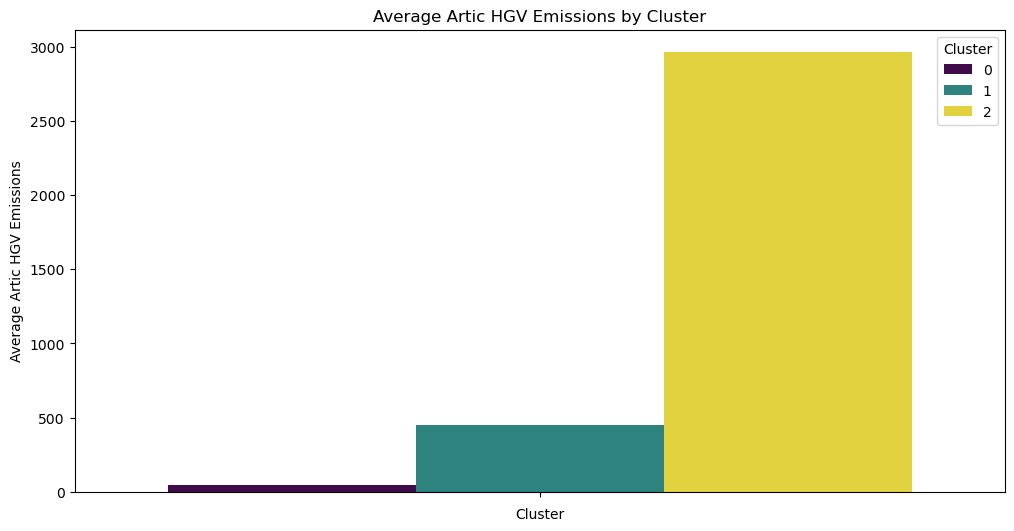

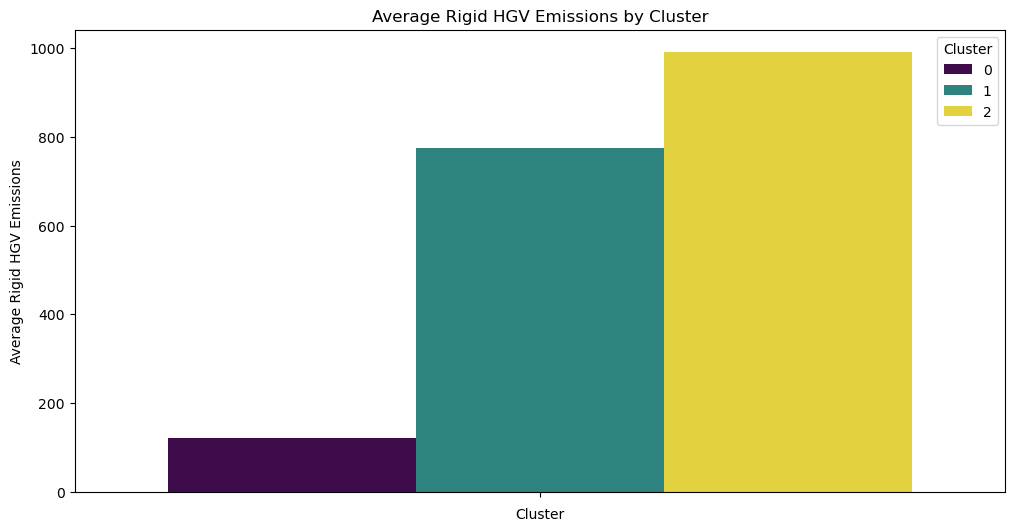

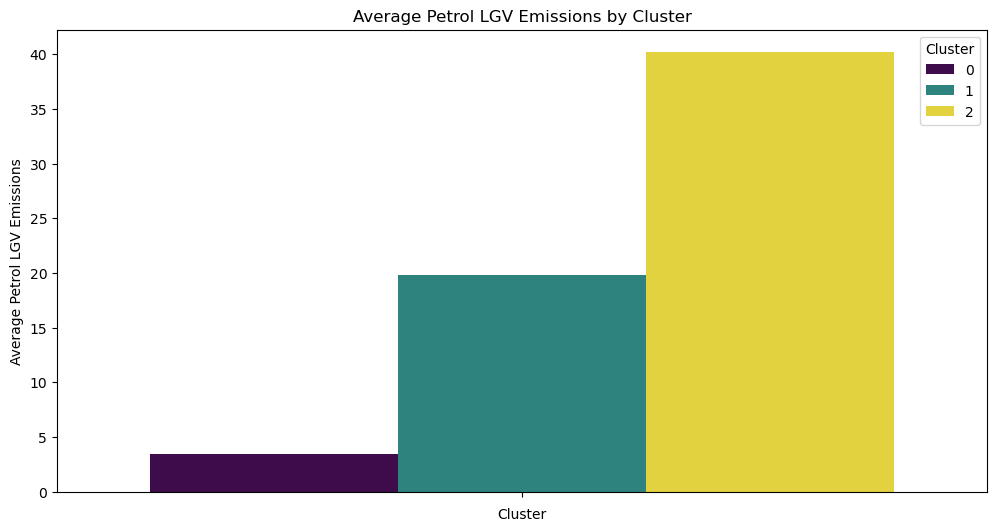

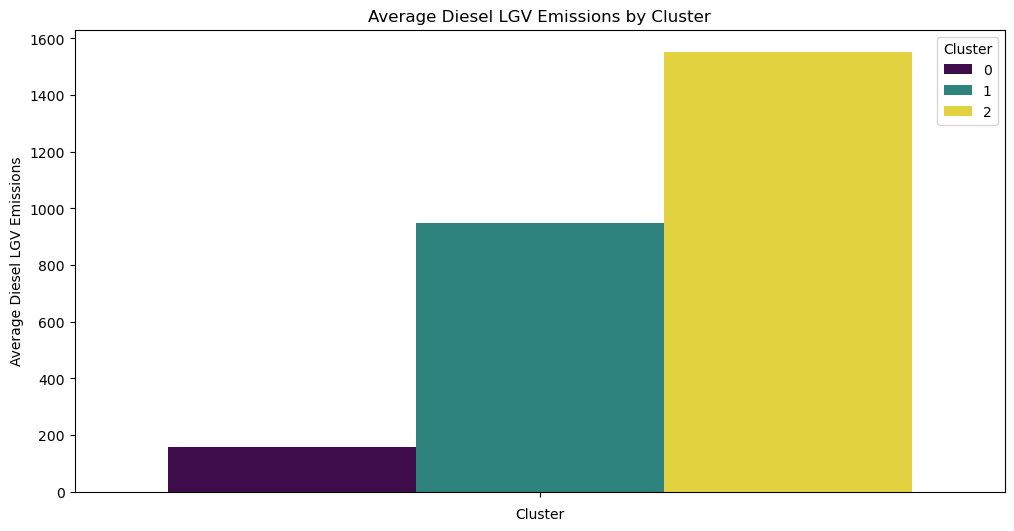

In [199]:
# Calculate the mean emissions for each cluster
cluster_summary = lorry_data.groupby('Cluster')[['Artic HGV', 'Rigid HGV', 'Petrol LGV', 'Diesel LGV']].mean().reset_index()

# Print the cluster summary
print(cluster_summary)


# Oisualize the sorted average emissions for each cluster
plt.figure(figsize=(12, 6))
sns.barplot(hue='Cluster', y='Artic HGV', data=cluster_summary, palette='viridis')
plt.title('Average Artic HGV Emissions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Artic HGV Emissions')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(hue='Cluster', y='Rigid HGV', data=cluster_summary, palette='viridis' )
plt.title('Average Rigid HGV Emissions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rigid HGV Emissions')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(hue='Cluster', y='Petrol LGV', data=cluster_summary, palette='viridis' )
plt.title('Average Petrol LGV Emissions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Petrol LGV Emissions')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(hue='Cluster', y='Diesel LGV', data=cluster_summary, palette='viridis' )
plt.title('Average Diesel LGV Emissions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Diesel LGV Emissions')
plt.show()

## cluster and visualise the CO2, NOX, PM10, PM2.5

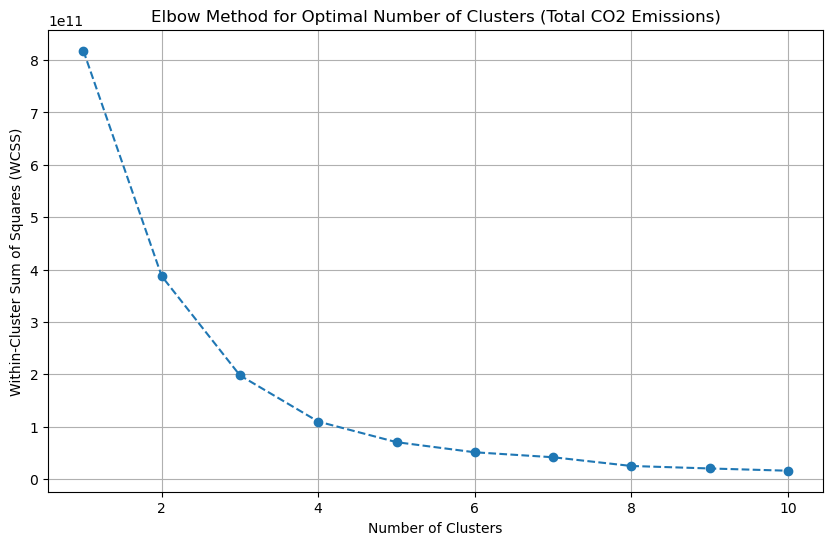

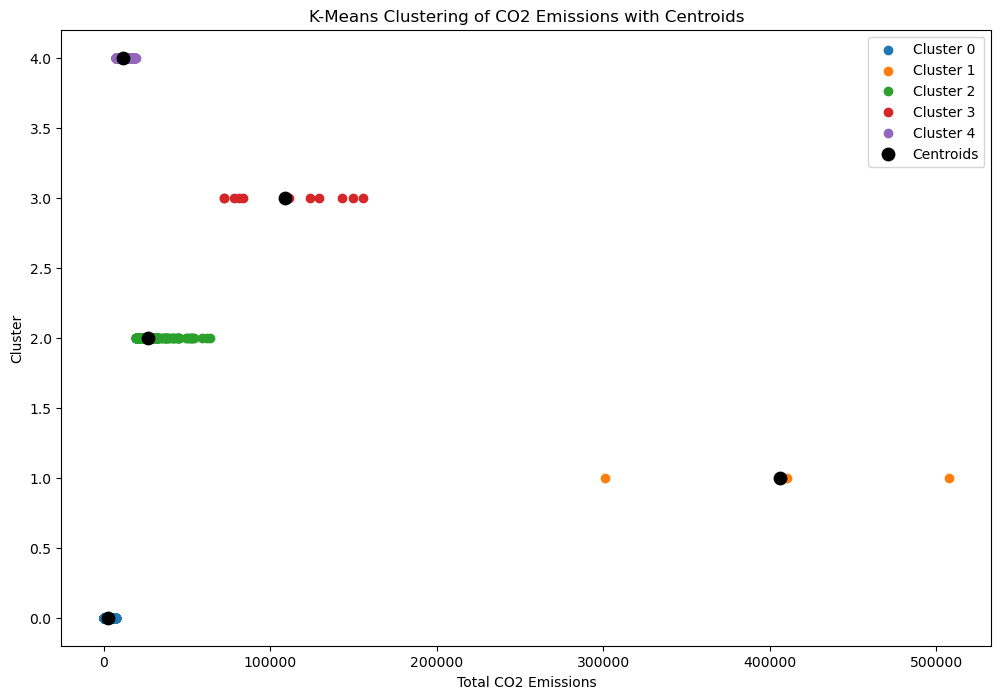

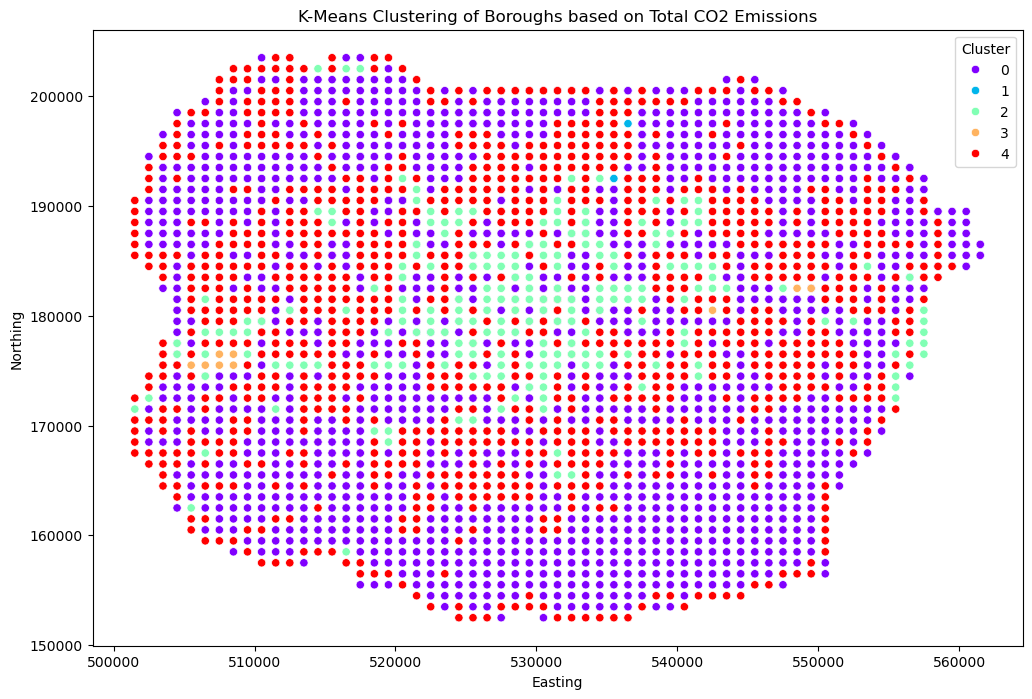

   Cluster          Total
0        0    2645.915350
1        4   11842.447208
2        2   26520.819713
3        3  109155.689051
4        1  406317.743043


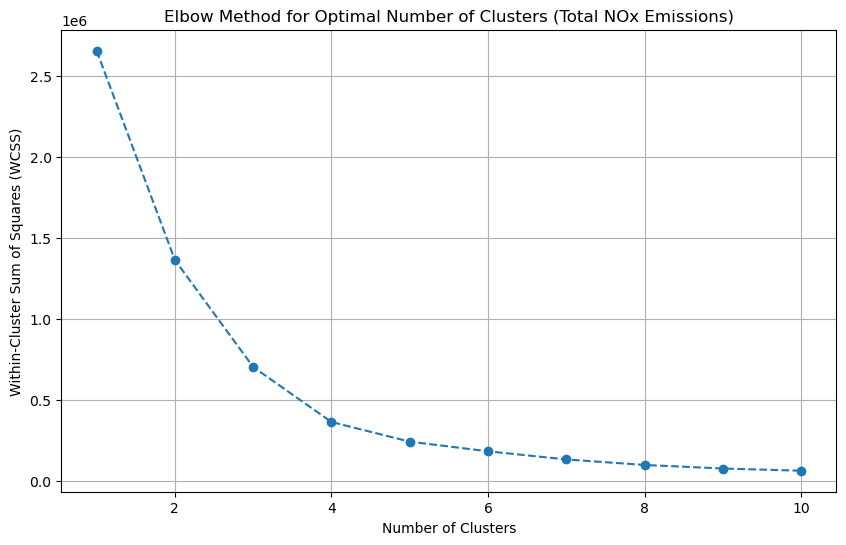

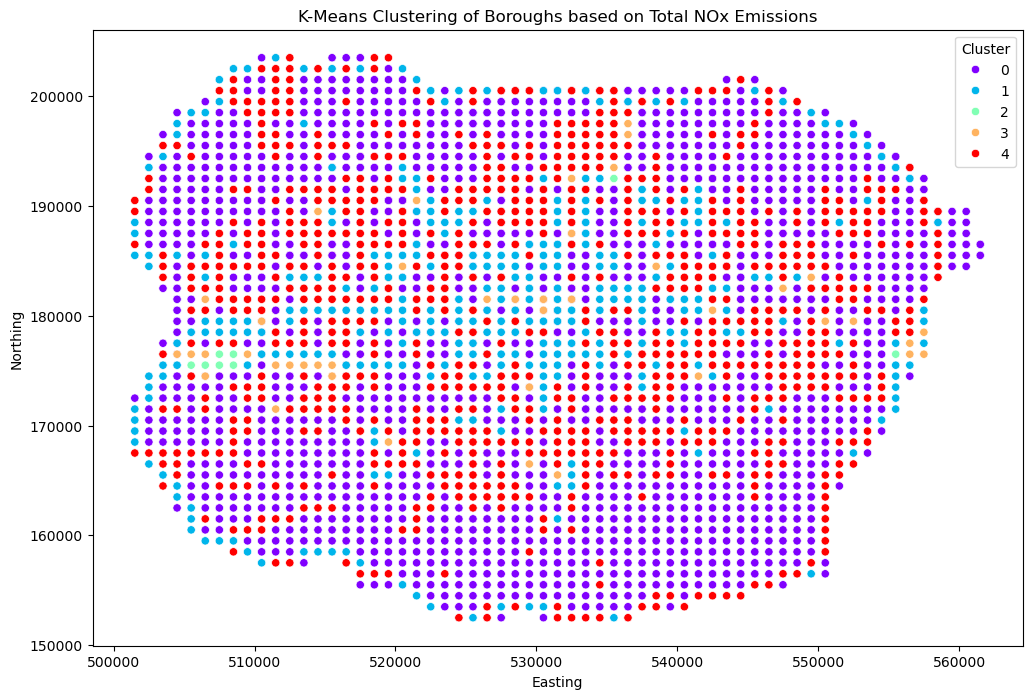

   Cluster       Total
0        0    4.659725
1        4   21.944522
2        1   48.159532
3        3  124.125603
4        2  360.864783


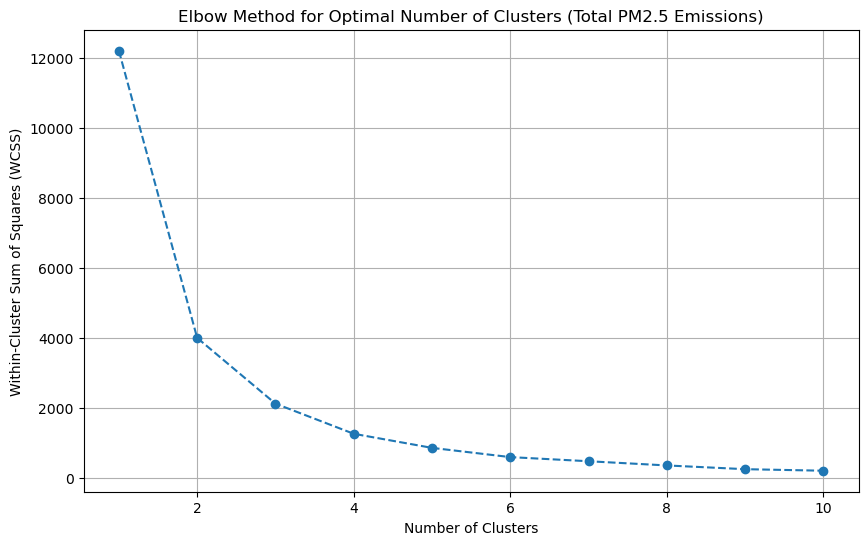

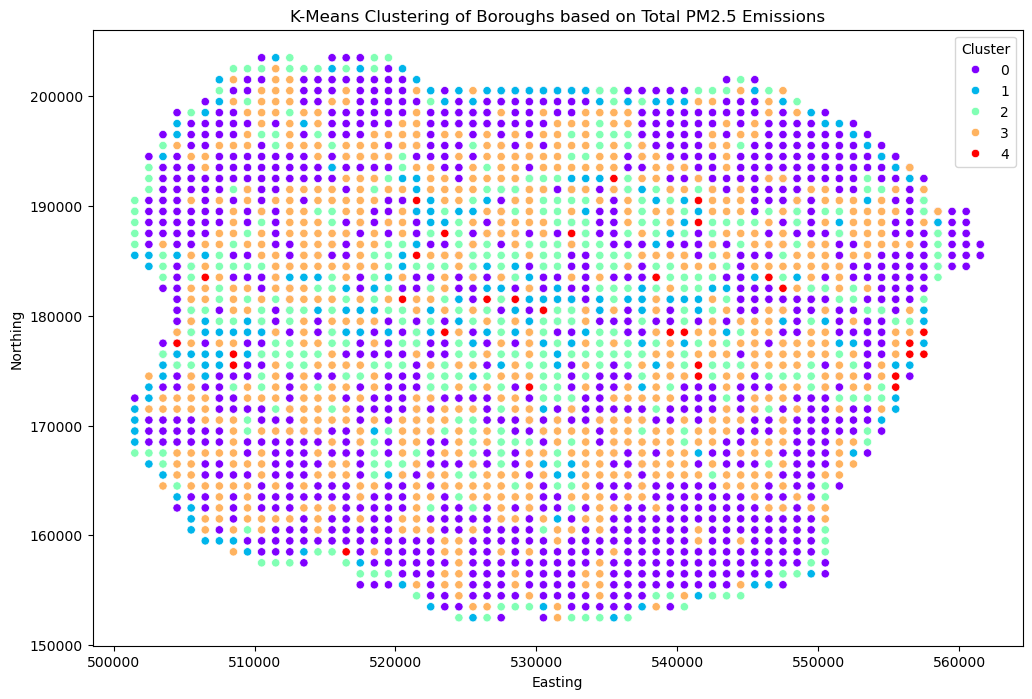

   Cluster     Total
0        0  0.375467
1        3  1.803067
2        2  3.643329
3        1  5.887938
4        4  9.900698


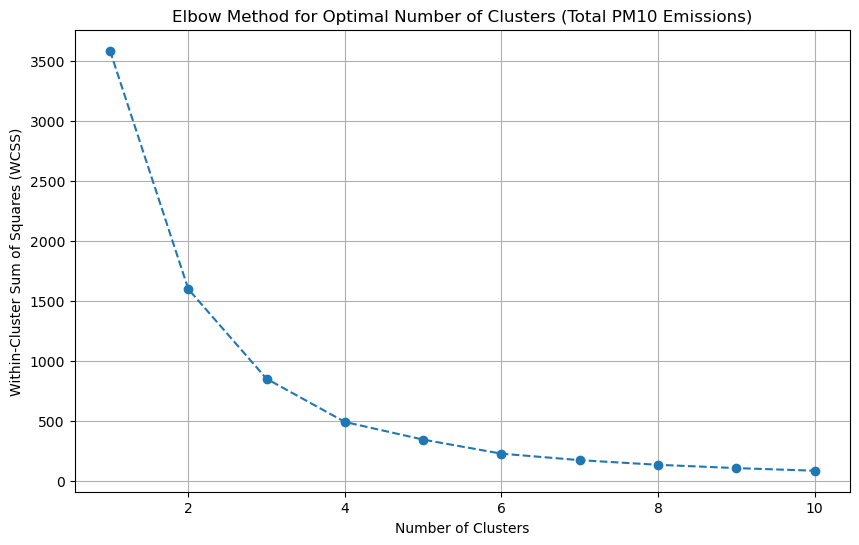

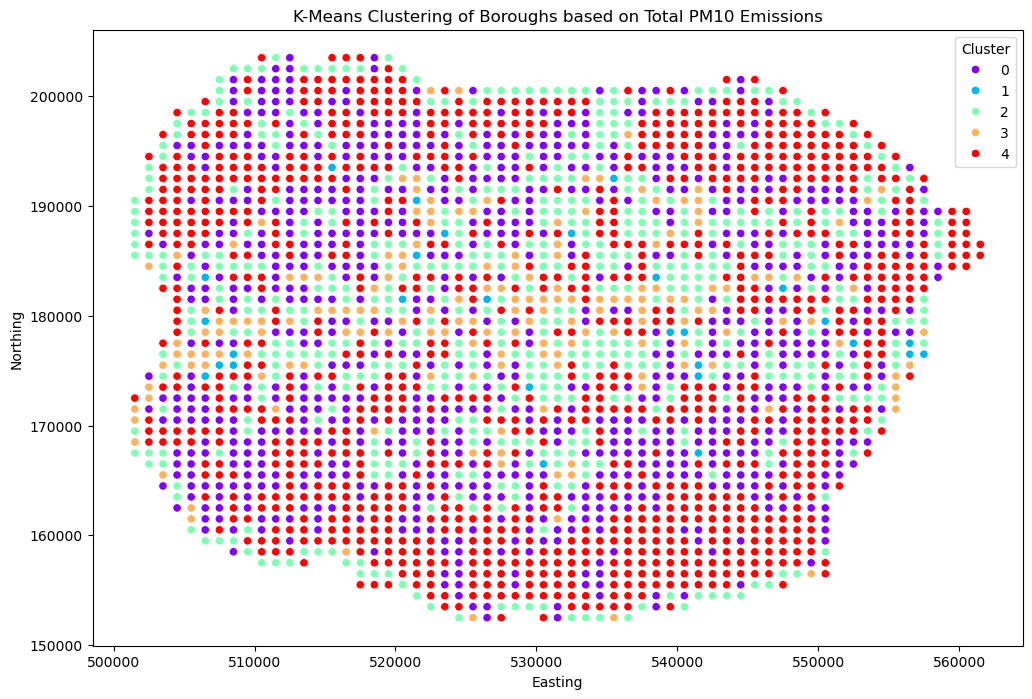

   Cluster     Total
0        4  0.175200
1        0  0.817623
2        2  1.639724
3        3  2.966842
4        1  6.873412


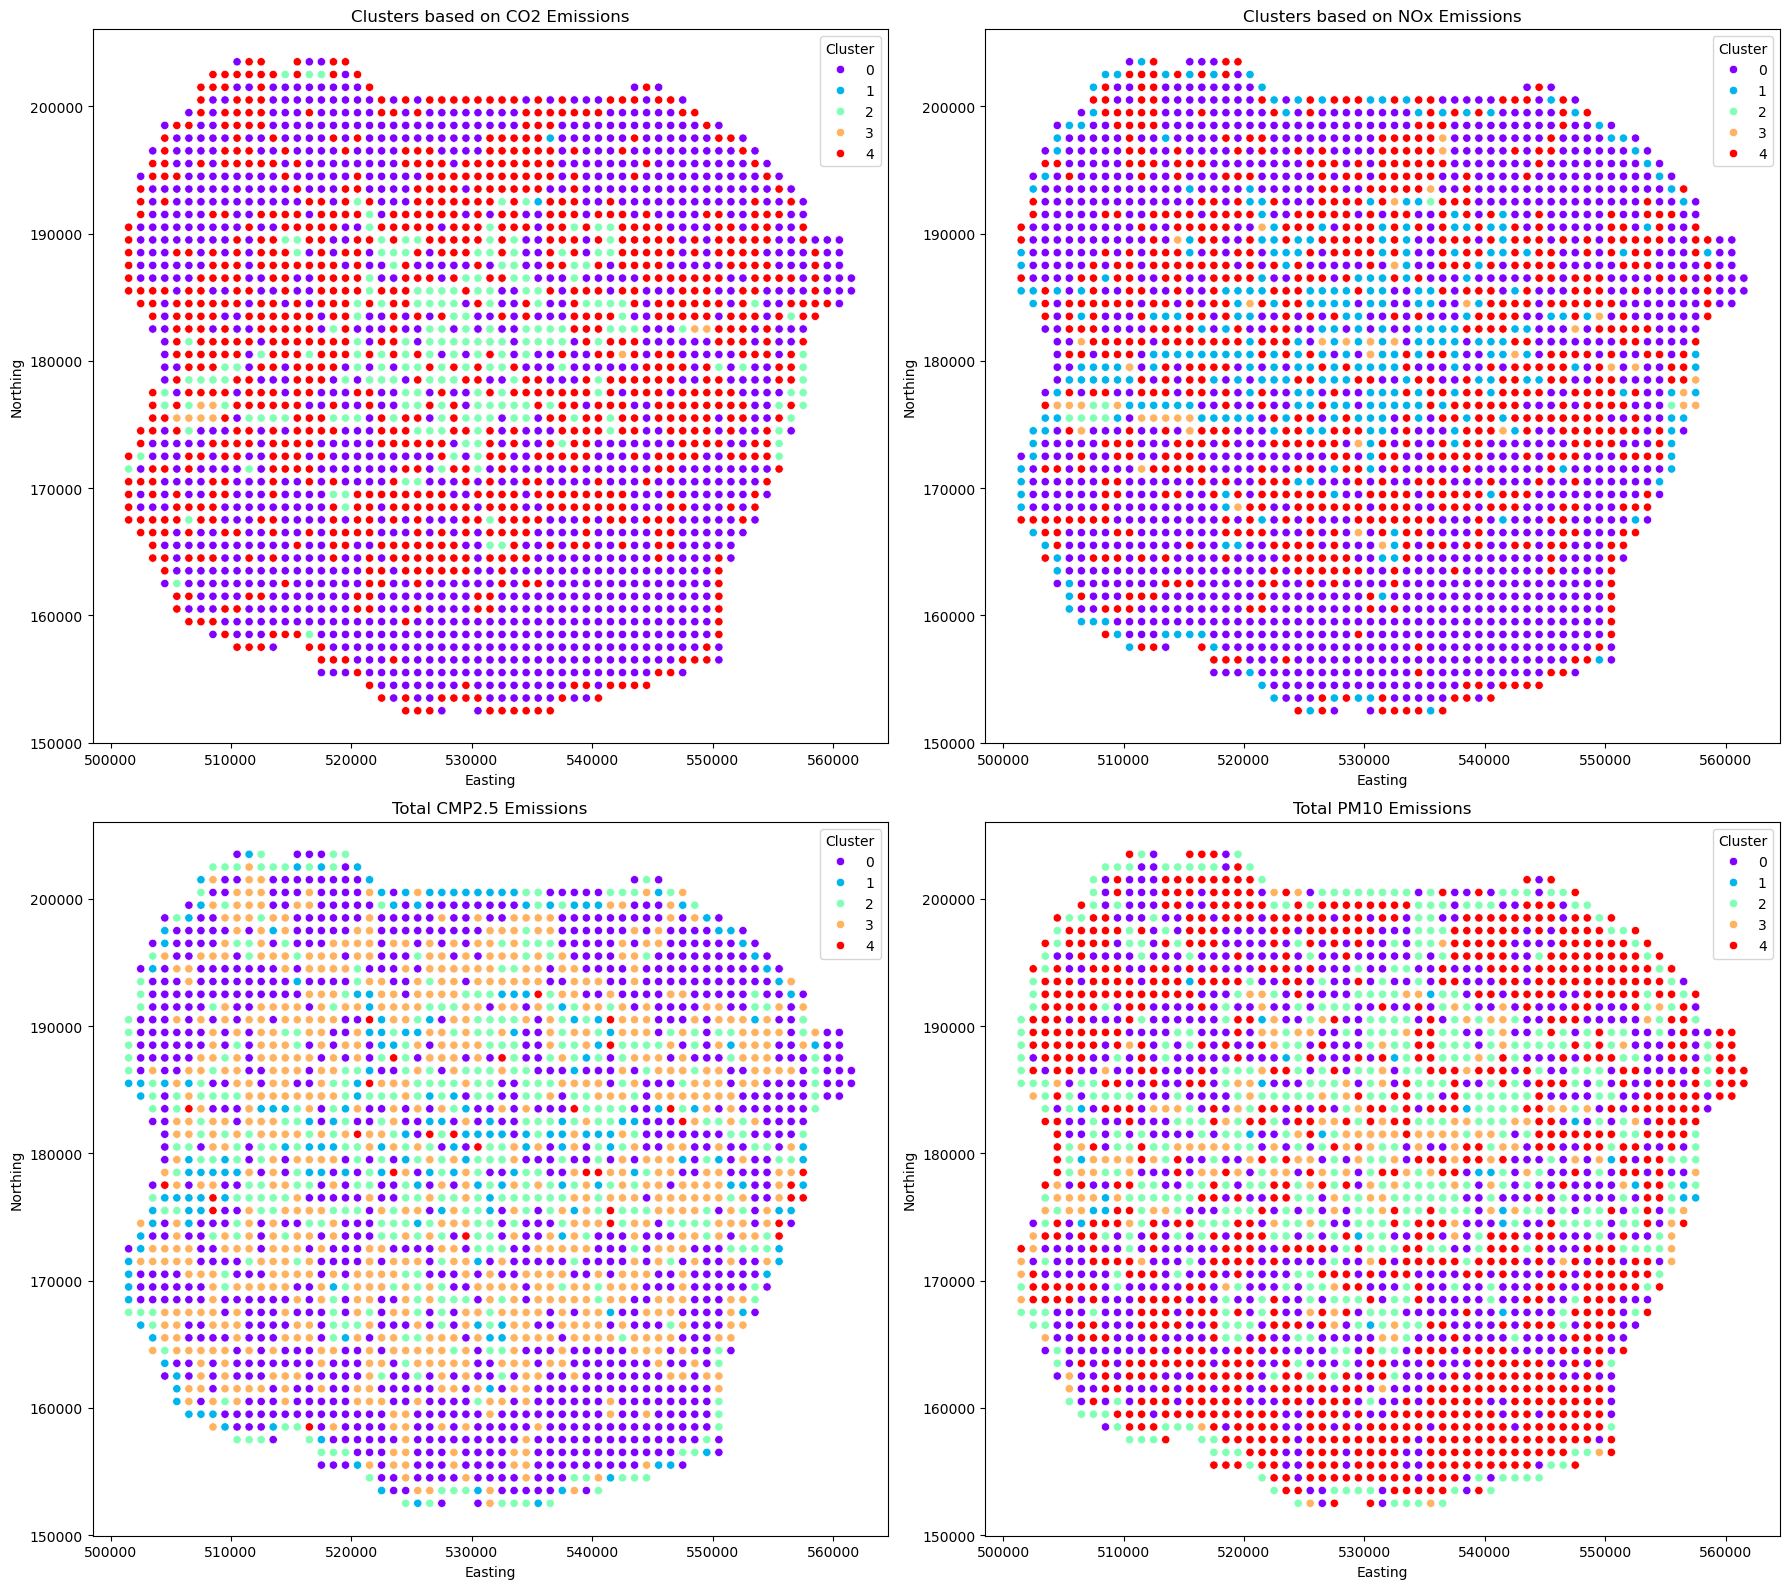

In [405]:
# select the data for clustering
total_data = data_2013[['Easting', 'Northing', 'Borough', 'Total']].copy()

# Handle any missing or non-numeric values in the HGV emissions data
total_data = total_data.dropna(subset=['Total'])

# Ensure all values are numeric
total_data[['Total']] = total_data[['Total']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
total_data = total_data.dropna()

# Calculate WCSS for a range of cluster numbers using the Elbow method
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(total_data[['Total']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters (Total CO2 Emissions)')
plt.grid(True)
plt.show()

# Apply K-Means clustering
optimal_clusters = 5  # based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data['Cluster'] = kmeans.fit_predict(total_data[['Total']])
centroids = kmeans.cluster_centers_

# Get unique labels
u_labels = np.unique(total_data['Cluster'])

# Plotting the results
plt.figure(figsize=(12, 8))
for i in u_labels:
    plt.scatter(total_data[total_data['Cluster'] == i]['Total'], [i]*sum(total_data['Cluster'] == i), label=f'Cluster {i}')
    
# Plotting the centroids
plt.scatter(centroids[:, 0], u_labels, s=80, color='k', label='Centroids')

plt.title('K-Means Clustering of CO2 Emissions with Centroids')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Cluster')
plt.legend()
plt.show()

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=total_data, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Total CO2 Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean emissions for each cluster
cluster_summary = total_data.groupby('Cluster')[['Total']].mean().reset_index()

# Sort the clusters by mean Total emissions
cluster_summary = cluster_summary.sort_values(by='Total').reset_index(drop=True)

# Print the cluster summary
print(cluster_summary)



#Nox
# select the data for clustering
total_data2 = data2_2013[['Easting', 'Northing', 'Borough', 'Total']].copy()

# Handle any missing or non-numeric values in the HGV emissions data
total_data2 = total_data2.dropna(subset=['Total'])

# Ensure all values are numeric
total_data2[['Total']] = total_data2[['Total']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
total_data2 = total_data2.dropna()

# Calculate WCSS for a range of cluster numbers using the Elbow method
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(total_data2[['Total']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters (Total NOx Emissions)')
plt.grid(True)
plt.show()

# Apply K-Means clustering
optimal_clusters = 5  # based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data2['Cluster'] = kmeans.fit_predict(total_data2[['Total']])

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=total_data2, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Total NOx Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean emissions for each cluster
cluster_summary = total_data2.groupby('Cluster')[['Total']].mean().reset_index()

# Sort the clusters by mean Total emissions
cluster_summary = cluster_summary.sort_values(by='Total').reset_index(drop=True)

# Print the cluster summary
print(cluster_summary)


#PM2.5
# select the data for clustering
total_data3 = data3_2013[['Easting', 'Northing', 'Borough', 'Total']].copy()

# Handle any missing or non-numeric values in the HGV emissions data
total_data3 = total_data3.dropna(subset=['Total'])

# Ensure all values are numeric
total_data3[['Total']] = total_data3[['Total']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
total_data3 = total_data3.dropna()

# Calculate WCSS for a range of cluster numbers using the Elbow method
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(total_data3[['Total']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters (Total PM2.5 Emissions)')
plt.grid(True)
plt.show()

# Apply K-Means clustering
optimal_clusters = 5  # based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data3['Cluster'] = kmeans.fit_predict(total_data3[['Total']])

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=total_data3, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Total PM2.5 Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean emissions for each cluster
cluster_summary = total_data3.groupby('Cluster')[['Total']].mean().reset_index()

# Sort the clusters by mean Total emissions
cluster_summary = cluster_summary.sort_values(by='Total').reset_index(drop=True)

# Print the cluster summary
print(cluster_summary)

#PM10
# select the data for clustering
total_data4 = data4_2013[['Easting', 'Northing', 'Borough', 'Total']].copy()

# Handle any missing or non-numeric values in the HGV emissions data
total_data4 = total_data4.dropna(subset=['Total'])

# Ensure all values are numeric
total_data4[['Total']] = total_data4[['Total']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
total_data4 = total_data4.dropna()

# Calculate WCSS for a range of cluster numbers using the Elbow method
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(total_data4[['Total']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters (Total PM10 Emissions)')
plt.grid(True)
plt.show()

# Apply K-Means clustering
optimal_clusters = 5  # based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data4['Cluster'] = kmeans.fit_predict(total_data4[['Total']])

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=total_data4, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Total PM10 Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean emissions for each cluster
cluster_summary = total_data4.groupby('Cluster')[['Total']].mean().reset_index()

# Sort the clusters by mean Total emissions
cluster_summary = cluster_summary.sort_values(by='Total').reset_index(drop=True)

# Print the cluster summary
print(cluster_summary)


# Scatter plot of grid IDs with CO2, NOx, PM2.5, PM10 emissions, colored by respective clusters
fig, ax = plt.subplots(2, 2, figsize=(18, 16))

# CO2 emissions - Cluster plot
sns.scatterplot(ax=ax[0, 0], x=total_data['Easting'], y=total_data['Northing'], hue=total_data['Cluster'], palette='rainbow')
ax[0, 0].set_title('Clusters based on CO2 Emissions')
ax[0, 0].set_xlabel('Easting')
ax[0, 0].set_ylabel('Northing')

# NOx emissions - Cluster plot
sns.scatterplot(ax=ax[0, 1], x=total_data2['Easting'], y=total_data2['Northing'], hue=total_data2['Cluster'], palette='rainbow')
ax[0, 1].set_title('Clusters based on NOx Emissions')
ax[0, 1].set_xlabel('Easting')
ax[0, 1].set_ylabel('Northing')

# PM2.5 emissions - Actual values
sns.scatterplot(ax=ax[1, 0], x=total_data3['Easting'], y=total_data['Northing'], hue=total_data3['Cluster'], palette='rainbow')
ax[1, 0].set_title('Total CMP2.5 Emissions')
ax[1, 0].set_xlabel('Easting')
ax[1, 0].set_ylabel('Northing')

# PM10 emissions - Actual values
sns.scatterplot(ax=ax[1, 1], x=total_data4['Easting'], y=total_data2['Northing'], hue=total_data4['Cluster'], palette='rainbow')
ax[1, 1].set_title('Total PM10 Emissions')
ax[1, 1].set_xlabel('Easting')
ax[1, 1].set_ylabel('Northing')

plt.tight_layout()
plt.show()


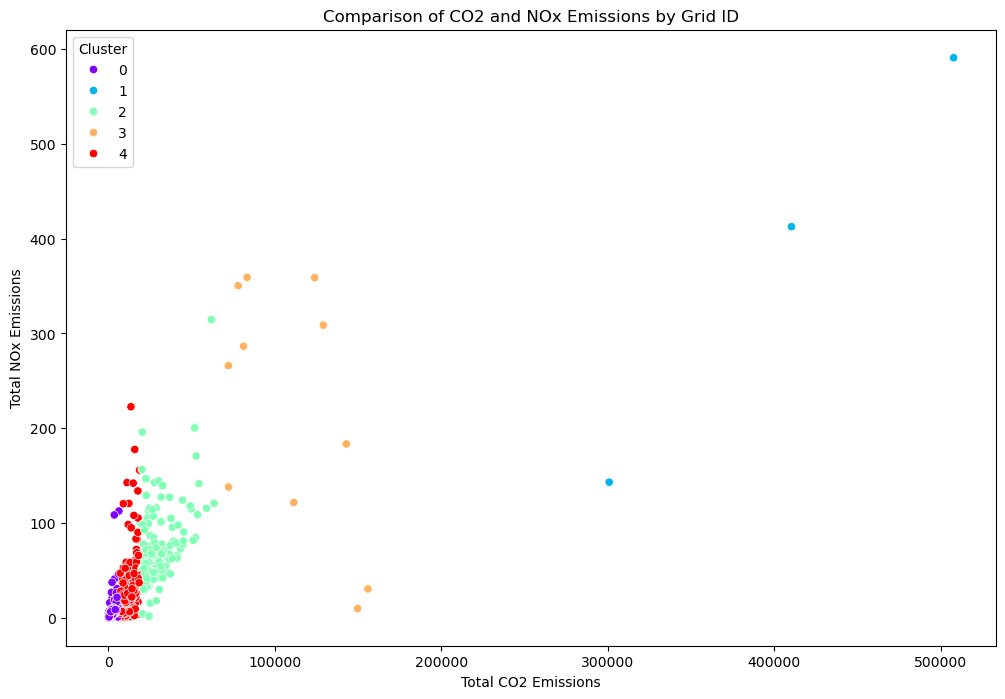

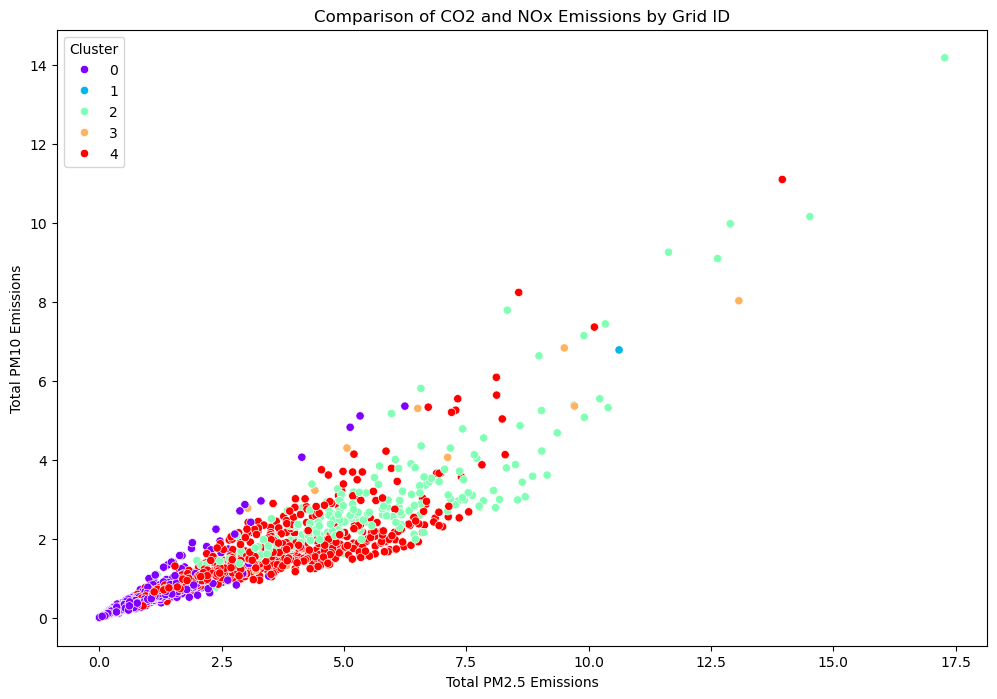

In [371]:
# Scatter plot with CO2 on x-axis and NOx on y-axis
plt.figure(figsize=(12, 8))
sns.scatterplot(x=total_data['Total'], y=total_data2['Total'], hue=total_data['Cluster'], palette='rainbow')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Total NOx Emissions')
plt.title('Comparison of CO2 and NOx Emissions by Grid ID')
plt.show()

# Scatter plot with  PM2.5 on x-axis and PM10 on y-axis,
plt.figure(figsize=(12, 8))
sns.scatterplot(x=total_data3['Total'], y=total_data4['Total'], hue=total_data['Cluster'], palette='rainbow')
plt.xlabel('Total PM2.5 Emissions')
plt.ylabel('Total PM10 Emissions')
plt.title('Comparison of CO2 and NOx Emissions by Grid ID')
plt.show()

## visualise the clusters on heatmaps

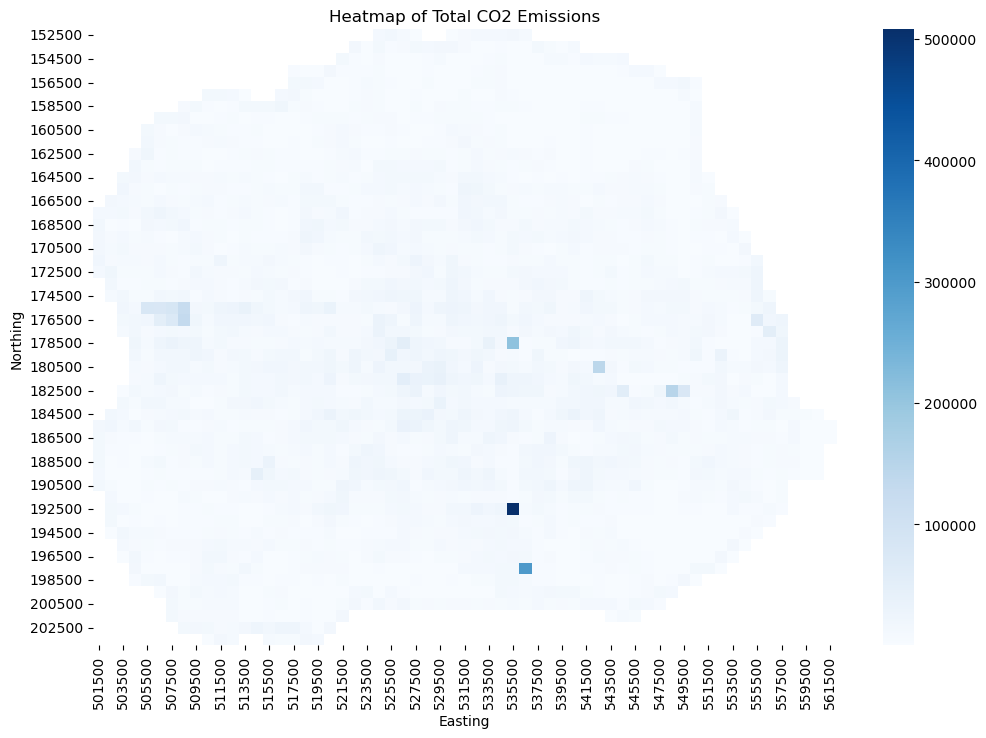

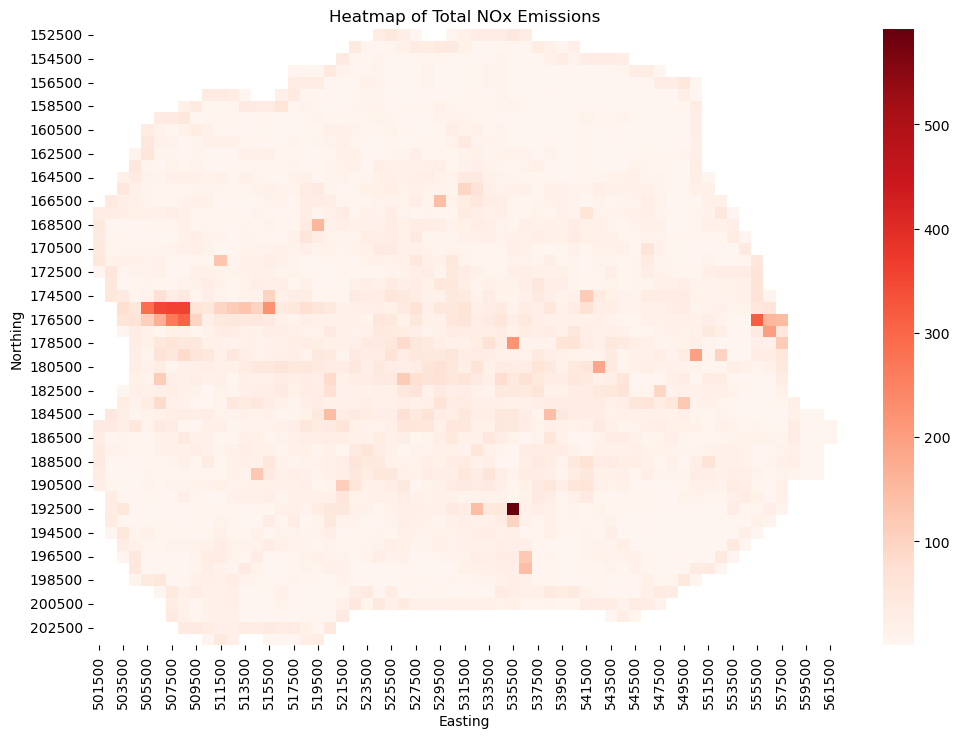

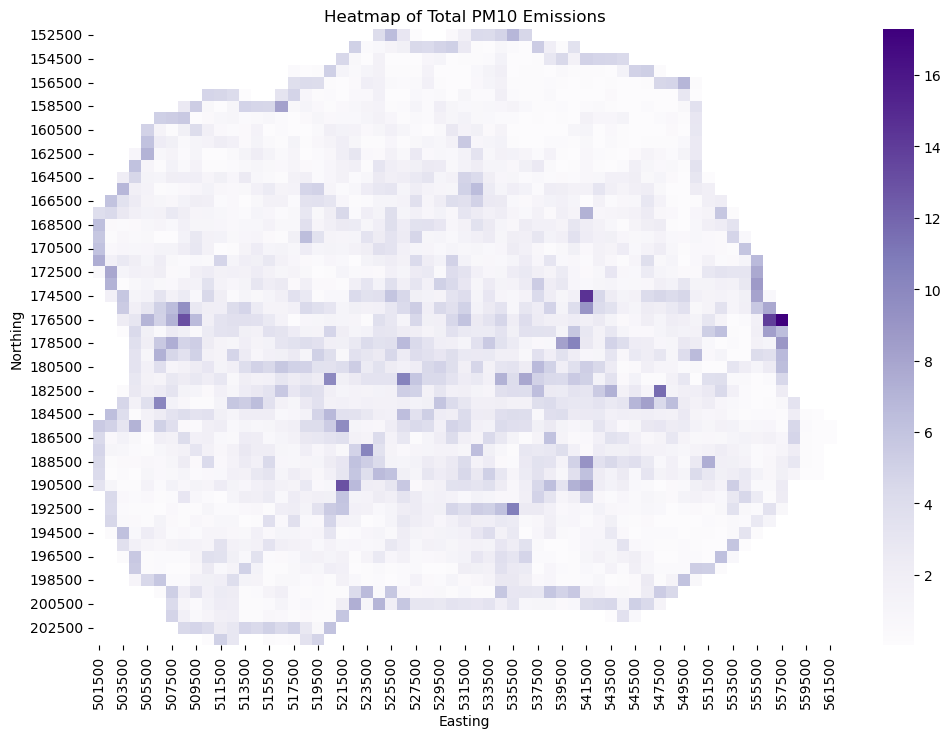

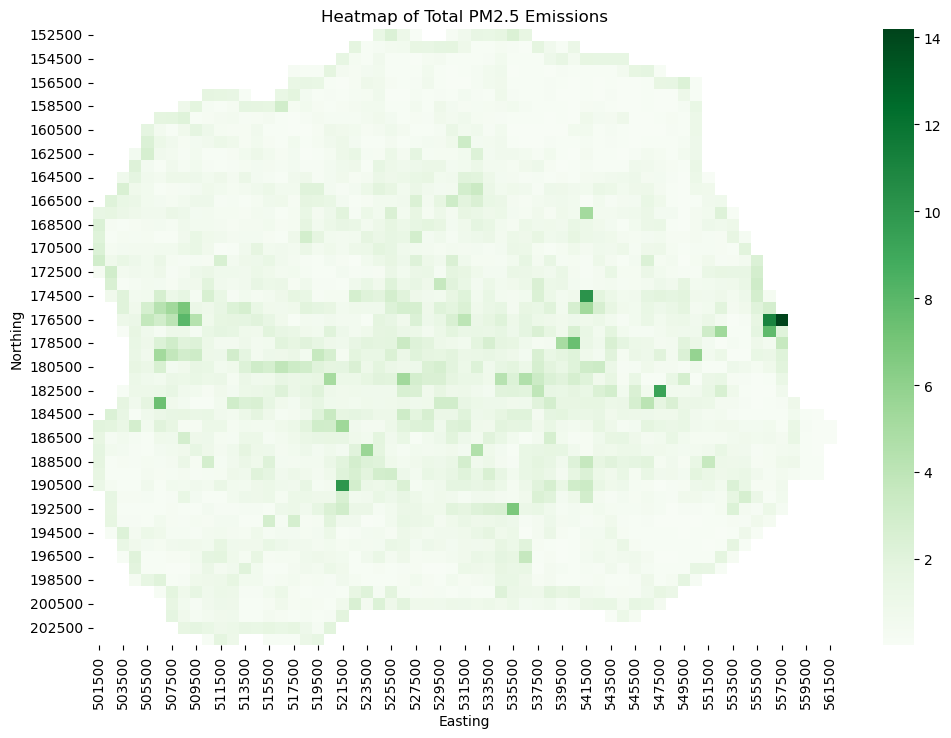

In [423]:
# Heatmap for CO2 emissions
plt.figure(figsize=(12, 8))
sns.heatmap(total_data.pivot_table(index='Northing', columns='Easting', values='Total'), cmap='Blues')
plt.title('Heatmap of Total CO2 Emissions')
plt.show()

# Heatmap for NOx emissions
plt.figure(figsize=(12, 8))
sns.heatmap(total_data2.pivot_table(index='Northing', columns='Easting', values='Total'), cmap='Reds')
plt.title('Heatmap of Total NOx Emissions')
plt.show()

# Heatmap for PM2.5 emissions
plt.figure(figsize=(12, 8))
sns.heatmap(total_data3.pivot_table(index='Northing', columns='Easting', values='Total'), cmap='Purples')
plt.title('Heatmap of Total PM10 Emissions')
plt.show()

# Heatmap for PM10 emissions
plt.figure(figsize=(12, 8))
sns.heatmap(total_data4.pivot_table(index='Northing', columns='Easting', values='Total'), cmap='Greens')
plt.title('Heatmap of Total PM2.5 Emissions')
plt.show()


## Cluster and visualise aviation data

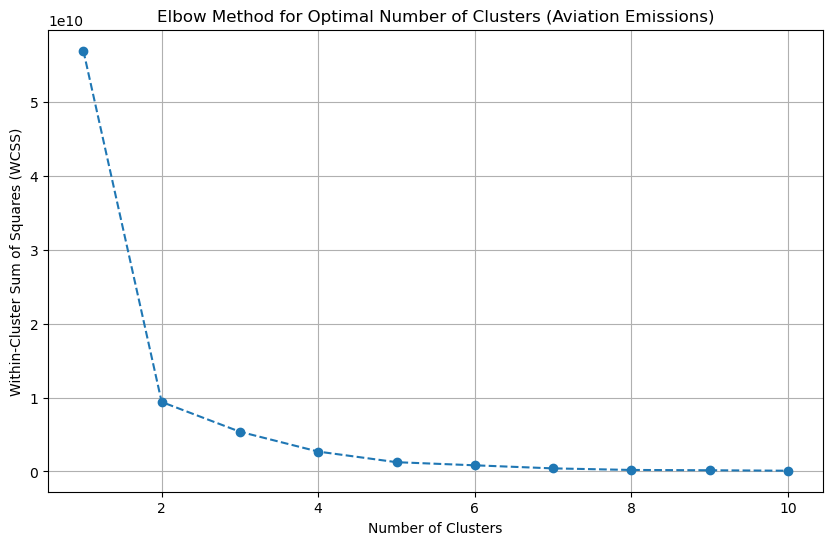

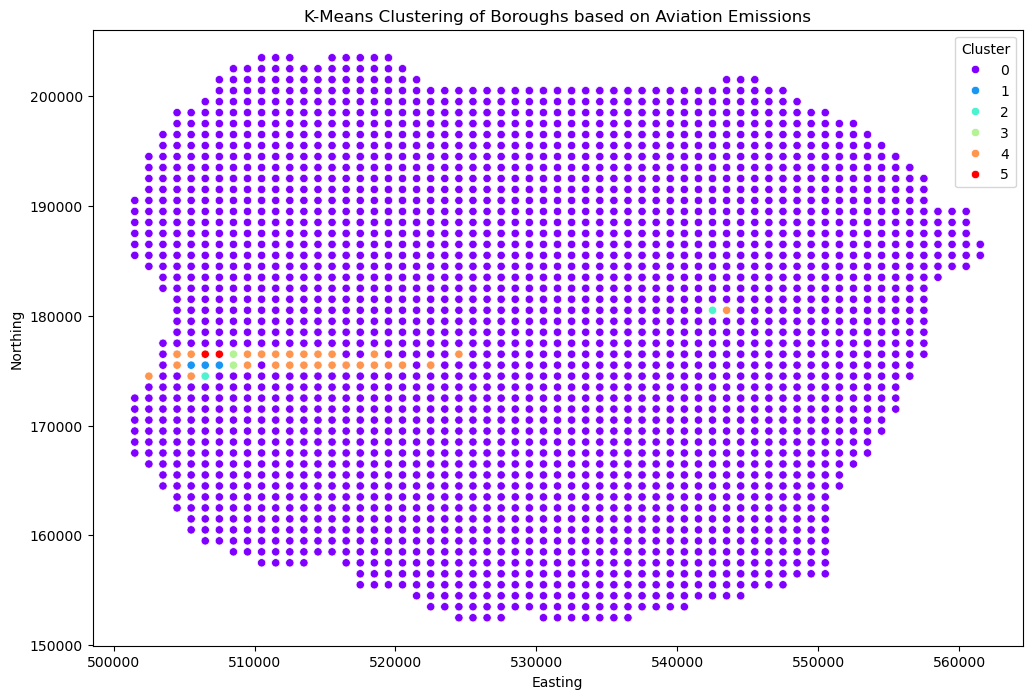

   Cluster       Aviation
0        0      25.601292
1        4    6204.679878
2        2   26206.427663
3        5   53018.957191
4        1   78281.778042
5        3  118708.025001
      Easting  Northing Borough  Aviation  Cluster
6710   510500    203500  NonGLA       0.0        0
6711   511500    203500  NonGLA       0.0        0
6712   512500    203500  NonGLA       0.0        0
6713   515500    203500  NonGLA       0.0        0
6714   516500    203500  NonGLA       0.0        0


In [312]:
# select the data for clustering
aviation_data = data_2013[['Easting', 'Northing', 'Borough', 'Aviation']].copy()

# Handle any missing or non-numeric values in the HGV emissions data
aviationl_data = aviation_data.dropna(subset=['Aviation'])

# Ensure all values are numeric
aviation_data[['Aviation']] = aviation_data[['Aviation']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
aviation_data = aviation_data.dropna()

# Calculate WCSS for a range of cluster numbers using the Elbow method
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(aviation_data[['Aviation']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters (Aviation Emissions)')
plt.grid(True)
plt.show()

# Apply K-Means clustering
optimal_clusters = 6  # based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
aviation_data['Cluster'] = kmeans.fit_predict(aviation_data[['Aviation']])

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=aviation_data, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Aviation Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean emissions for each cluster
cluster_summary = aviation_data.groupby('Cluster')[['Aviation']].mean().reset_index()

# Sort the clusters by mean Total emissions
cluster_summary = cluster_summary.sort_values(by='Aviation').reset_index(drop=True)

# Print the cluster summary
print(cluster_summary)


# Display the first few rows of the clustered data
print(aviation_data.head())


## evaluation metrics
- Silhouette Score
- Calinski-Harabasz Index
- Davies-Bouldin Index

In [391]:
#CO2 evaluation metrics
# Silhouette Score
silhouette_avg = silhouette_score(total_data[['Total']], total_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(total_data[['Total']], total_data['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(total_data[['Total']], total_data['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

#NOx evaluation metrics
# Silhouette Score
silhouette_avg = silhouette_score(total_data2[['Total']], total_data2['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(total_data2[['Total']], total_data2['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(total_data2[['Total']], total_data2['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

#PM2.5 evaluation metrics
# Silhouette Score
silhouette_avg = silhouette_score(total_data3[['Total']], total_data3['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(total_data3[['Total']], total_data3['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(total_data3[['Total']], total_data3['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

#PM10 evaluation metrics
# Silhouette Score
silhouette_avg = silhouette_score(total_data4[['Total']], total_data4['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz Index 

calinski_harabasz_avg = calinski_harabasz_score(total_data4[['Total']], total_data4['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(total_data4[['Total']], total_data4['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.6213518456407966
Calinski-Harabasz Index: 8908.162664748166
Davies-Bouldin Index: 0.47969328126876515
Silhouette Score: 0.6189257990502612
Calinski-Harabasz Index: 8378.611703582415
Davies-Bouldin Index: 0.46869678333890186
Silhouette Score: 0.6088123791922971
Calinski-Harabasz Index: 10921.59129945315
Davies-Bouldin Index: 0.5192249736320794
Silhouette Score: 0.6066707598051662
Calinski-Harabasz Index: 7905.250827946009
Davies-Bouldin Index: 0.5142926380951155


## Combine total CO2, NOX, PM10, PM2,5 individual emissions to make total emissions data

In [415]:
# Function to prepare data
def prepare_data(data, value_col, label):
    data = data[['Easting', 'Northing', value_col]].copy()
    data = data.dropna(subset=[value_col])
    data[value_col] = data[value_col].apply(pd.to_numeric, errors='coerce')
    data = data.dropna()
    data = data.rename(columns={value_col: label})
    return data

# Prepare data for each emission type
co2_data = prepare_data(data_2013, 'Total', 'Total_CO2')
nox_data = prepare_data(data2_2013, 'Total', 'Total_NOx')
pm25_data = prepare_data(data3_2013, 'Total', 'Total_PM2.5')
pm10_data = prepare_data(data4_2013, 'Total', 'Total_PM10')
# Merge datasets on Easting and Northing
combined_data = co2_data.merge(nox_data, on=['Easting', 'Northing'], how='inner')
combined_data = combined_data.merge(pm25_data, on=['Easting', 'Northing'], how='inner')
combined_data = combined_data.merge(pm10_data, on=['Easting', 'Northing'], how='inner')

# Display the first few rows of the combined dataset
print(combined_data.head())


   Easting  Northing     Total_CO2  Total_NOx  Total_PM2.5  Total_PM10
0   510500    203500    657.304039   1.213751     0.130963    0.085784
1   511500    203500  14568.389161  41.850106     5.010572    1.814326
2   512500    203500   8034.721767  23.079704     2.889030    1.017989
3   515500    203500   9313.431445   2.068405     0.148034    0.100359
4   516500    203500   4275.182041   1.942320     0.134681    0.090045


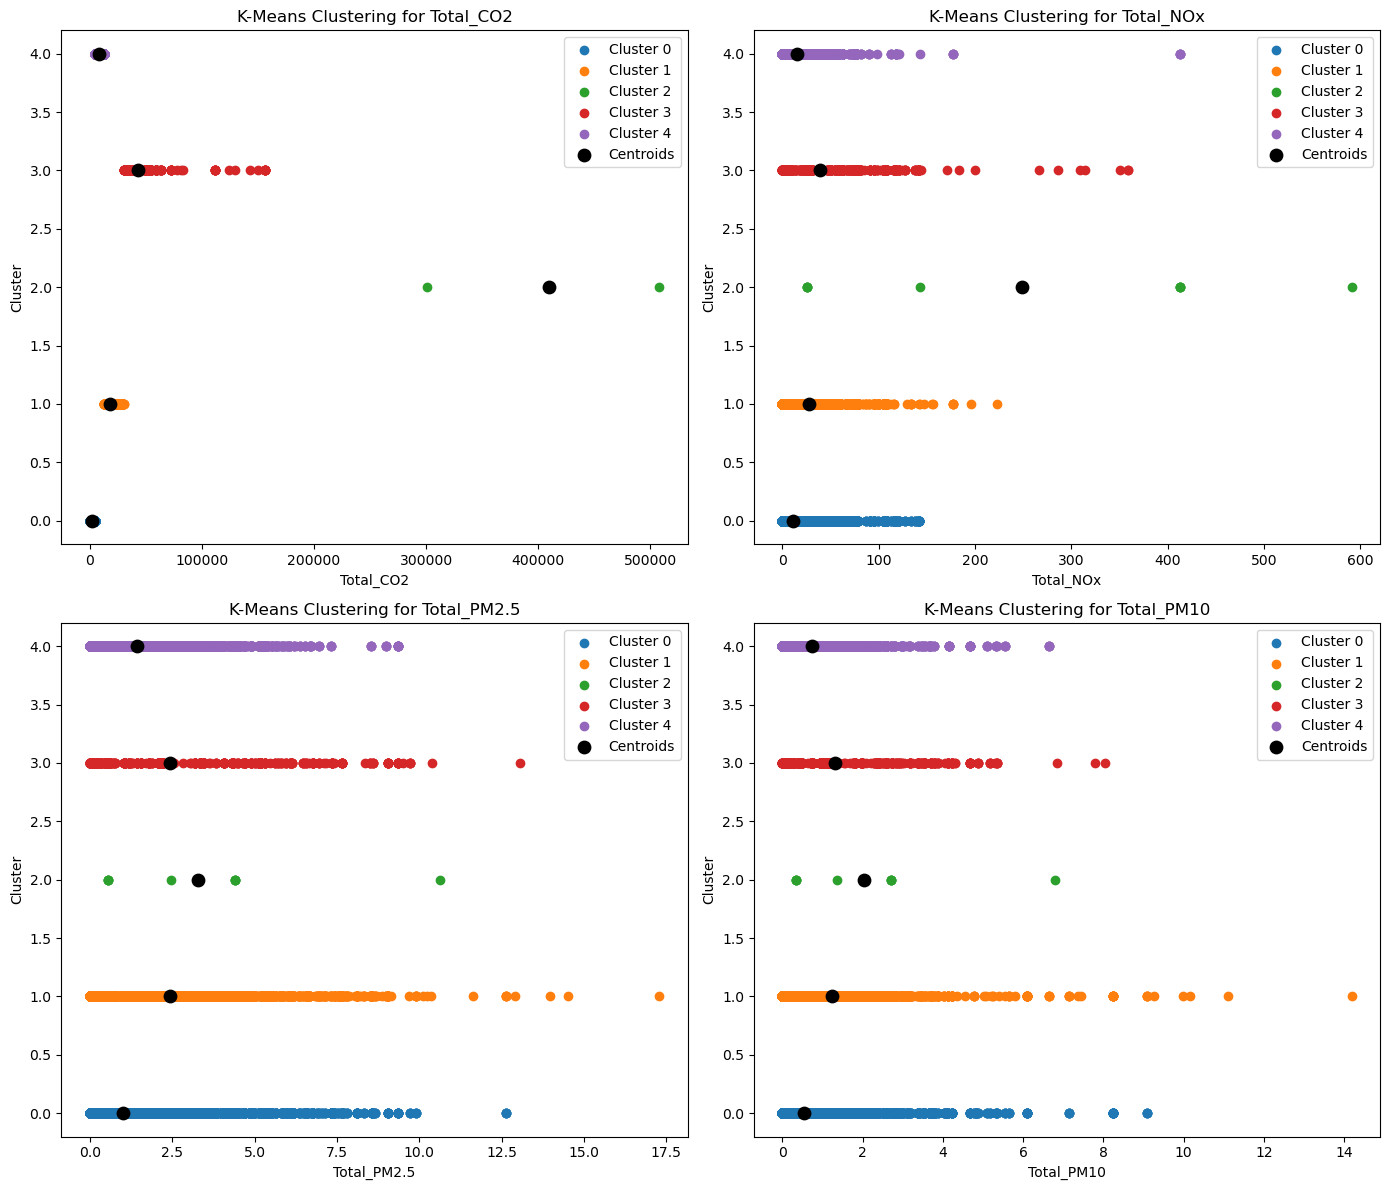

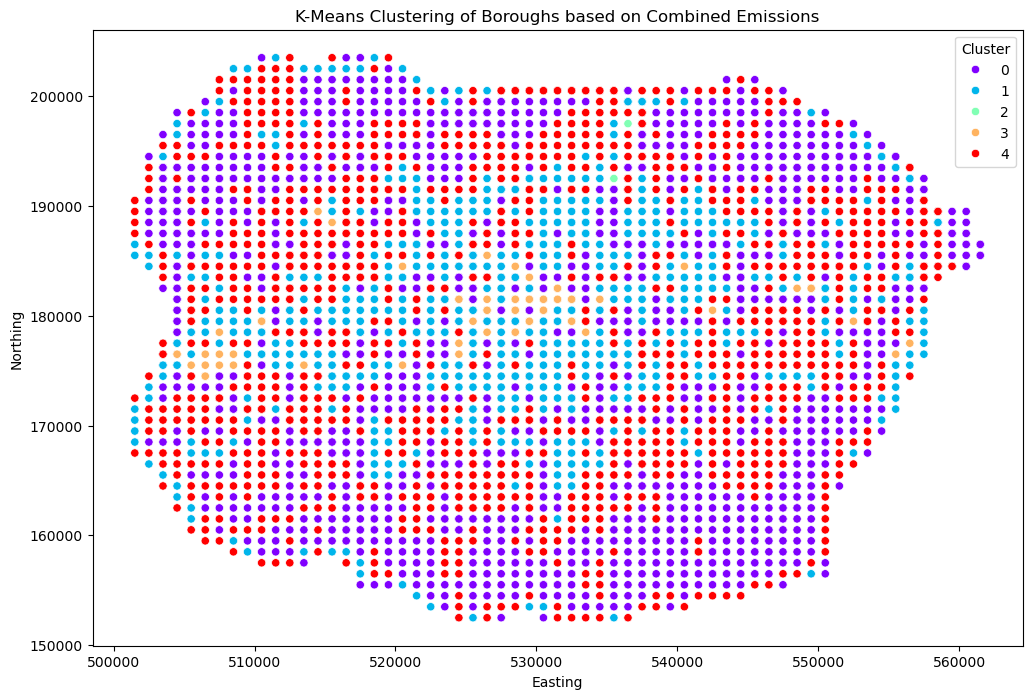

   Cluster        Easting       Northing      Total_CO2   Total_NOx  \
0        0  531534.181078  179181.926077    1574.677943   10.688507   
1        1  530029.829087  181082.715253   17849.405337   27.800170   
2        2  535600.000000  181800.000000  409136.155807  248.764301   
3        3  528312.351544  180714.964371   42618.447262   38.715368   
4        4  529634.270549  179899.512265    8236.022598   14.858710   

   Total_PM2.5  Total_PM10  
0     0.994135    0.528179  
1     2.442792    1.247827  
2     3.289775    2.034013  
3     2.421660    1.301813  
4     1.438861    0.729927  
Silhouette Score: 0.6368399273473421
Calinski-Harabasz Index: 59196.19805987228
Davies-Bouldin Index: 0.4256340820802813


In [419]:
# Apply K-Means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(combined_data[['Total_CO2', 'Total_NOx', 'Total_PM2.5', 'Total_PM10']])
centroids = kmeans.cluster_centers_

# Get unique labels
u_labels = np.unique(combined_data['Cluster'])

# Plotting the clusters and centroids for each emission type
plt.figure(figsize=(14, 12))
for i, emission in enumerate(['Total_CO2', 'Total_NOx', 'Total_PM2.5', 'Total_PM10'], start=1):
    plt.subplot(2, 2, i)
    for label in u_labels:
        plt.scatter(combined_data[combined_data['Cluster'] == label][emission], 
                    [label]*sum(combined_data['Cluster'] == label), 
                    label=f'Cluster {label}')
    plt.scatter(centroids[:, i-1], u_labels, s=80, color='k', label='Centroids')
    plt.title(f'K-Means Clustering for {emission}')
    plt.xlabel(emission)
    plt.ylabel('Cluster')
    plt.legend()

plt.tight_layout()
plt.show()

# Visualize the clusters on the map
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_data, x='Easting', y='Northing', hue='Cluster', palette='rainbow')
plt.title('K-Means Clustering of Boroughs based on Combined Emissions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean emissions for each cluster
cluster_summary = combined_data.groupby('Cluster').mean().reset_index()

# Print the cluster summary
print(cluster_summary)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(combined_data[['Total_CO2', 'Total_NOx', 'Total_PM2.5', 'Total_PM10']], combined_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(combined_data[['Total_CO2', 'Total_NOx', 'Total_PM2.5', 'Total_PM10']], combined_data['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(combined_data[['Total_CO2', 'Total_NOx', 'Total_PM2.5', 'Total_PM10']], combined_data['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
